In [1]:
import numpy as np 
import pandas as pd 
import os
import pickle
from time import sleep

In [2]:
import numpy as np 
import os
import pandas as pd 
import time
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier , GradientBoostingClassifier , AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:

df1 = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("Wednesday-workingHours.pcap_ISCX.csv")


In [4]:
nRowsRead = None 
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8
df.shape

(2830743, 79)

In [5]:
df[' Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

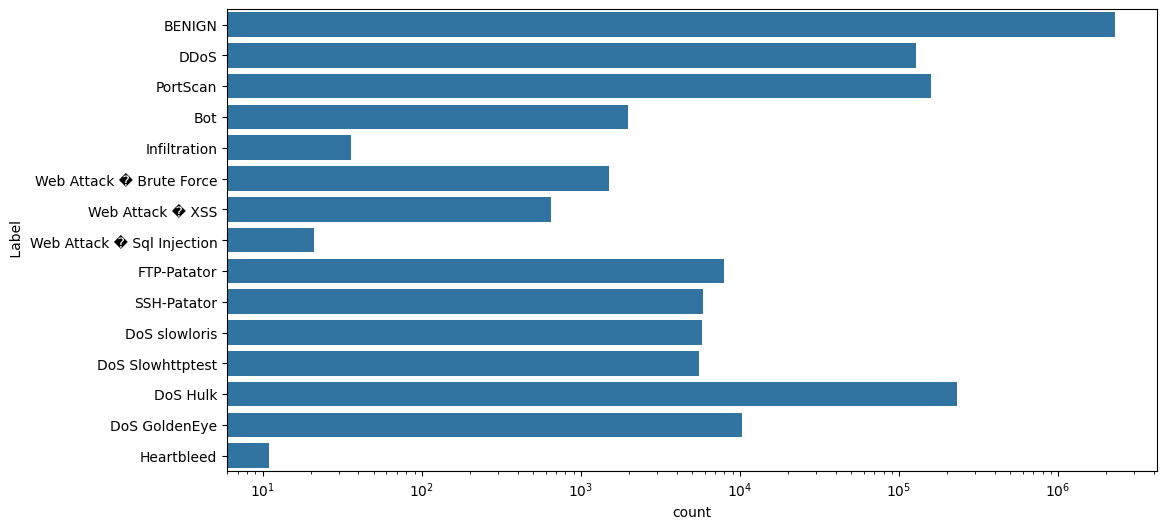

In [6]:
plt.figure(figsize=(12, 6))
plot = sns.countplot(y=df[' Label'])
plt.xscale('log')
fig = plot.get_figure()
fig.savefig('img1.png')

In [7]:
df.duplicated().sum()

308381

In [8]:
df.shape

(2830743, 79)

In [9]:
df =  df.drop_duplicates(keep="first")

In [10]:
df.isnull().sum().sort_values(ascending = False)

Flow Bytes/s             353
 Destination Port          0
 Bwd Avg Bytes/Bulk        0
 Fwd Avg Packets/Bulk      0
Fwd Avg Bytes/Bulk         0
                        ... 
 Bwd IAT Mean              0
Bwd IAT Total              0
 Fwd IAT Min               0
 Fwd IAT Max               0
 Label                     0
Length: 79, dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(2522009, 79)

In [13]:
df.isnull().sum().sort_values(ascending = False)

 Destination Port        0
 ECE Flag Count          0
 Fwd Avg Packets/Bulk    0
Fwd Avg Bytes/Bulk       0
 Fwd Header Length.1     0
                        ..
Bwd IAT Total            0
 Fwd IAT Min             0
 Fwd IAT Max             0
 Fwd IAT Std             0
 Label                   0
Length: 79, dtype: int64

In [14]:
df=df.groupby(' Label').filter(lambda x:len(x)>10000)
df[' Label'].value_counts()

BENIGN           2096134
DoS Hulk          172846
DDoS              128016
PortScan           90819
DoS GoldenEye      10286
Name:  Label, dtype: int64

In [15]:
integer = []
f = []
for i in df.columns[:-1]:
    if df[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df[integer] = df[integer].astype("int32")
df[f] = df[f].astype("float32")

In [16]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

C:\Users\hp\AppData\Local\Temp\ipykernel_9592\4277620578.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]


In [17]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
              colname = corr_matrix.columns[i]                  
              col_corr.add(colname)
    return col_corr

In [18]:
corr_features = correlation(df, 0.85)
corr_features

C:\Users\hp\AppData\Local\Temp\ipykernel_9592\1360579028.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


{' Active Min',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Avg Fwd Segment Size',
 ' Bwd IAT Max',
 ' Bwd IAT Mean',
 ' Bwd IAT Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Flow IAT Max',
 ' Fwd Header Length.1',
 ' Fwd IAT Max',
 ' Fwd IAT Mean',
 ' Fwd IAT Min',
 ' Fwd IAT Std',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 ' Idle Max',
 ' Idle Min',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' SYN Flag Count',
 ' Subflow Bwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Fwd Bytes',
 ' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 'Fwd IAT Total',
 'Fwd Packets/s',
 'Idle Mean',
 'Subflow Fwd Packets'}

In [19]:
df.drop(corr_features,axis=1,inplace=True)

In [20]:
y = df[' Label']
x = df.drop([' Label'],axis=1)

In [21]:
rus = RandomUnderSampler(random_state=0)
rus.fit(x, y)
Xn, yn = rus.fit_resample(x, y)

In [22]:
Xn.head()
Xn.shape

(51430, 41)

In [23]:
cols = list(Xn.columns)
for col in cols:
    Xn[col] = stats.zscore(Xn[col])

In [24]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(Xn,yn,test_size=0.30,random_state=0)

In [25]:
print(np.any(np.isnan(X_train)))
print(np.all(np.isfinite(X_train)))

True
False


In [26]:
def plot_confusion_matrix(cm,title,cmap=None,target=None,normalize=False):

    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('viridis')
    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target is not None:
        ticks = np.arange(len(target))
        plt.xticks(ticks, target, rotation=45)
        plt.yticks(ticks, target)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
    plt.grid(False)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    plt.savefig(title, bbox_inches='tight', dpi=300)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
 Y_train.unique()

array(['DDoS', 'DoS GoldenEye', 'PortScan', 'DoS Hulk', 'BENIGN'],
      dtype=object)

In [27]:
X_train.shape

(36001, 41)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
# Y_val_encoded = label_encoder.transform(Y_val)
Y_test_encoded = label_encoder.transform(Y_test)

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(41,)),  # num_features is the number of input features
    Dropout(0.2),  # Dropout layer to reduce overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')  # num_classes is the number of classes in your multiclass problem
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for integer labels
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train_encoded , epochs=10, validation_data=(X_test, Y_test_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

Epoch 1/10
1126/1126 [==============================] - 5s 4ms/step - loss: 1.6096 - accuracy: 0.1974 - val_loss: 1.6094 - val_accuracy: 0.2023
Epoch 2/10
1126/1126 [==============================] - 4s 3ms/step - loss: 1.6096 - accuracy: 0.1966 - val_loss: 1.6095 - val_accuracy: 0.1989
Epoch 3/10
1126/1126 [==============================] - 4s 3ms/step - loss: 1.6095 - accuracy: 0.1982 - val_loss: 1.6095 - val_accuracy: 0.1989
Epoch 4/10
1126/1126 [==============================] - 3s 3ms/step - loss: 1.6096 - accuracy: 0.1952 - val_loss: 1.6095 - val_accuracy: 0.1997
Epoch 5/10
1126/1126 [==============================] - 3s 3ms/step - loss: 1.6096 - accuracy: 0.1962 - val_loss: 1.6095 - val_accuracy: 0.1989
Epoch 6/10
1126/1126 [==============================] - 4s 3ms/step - loss: 1.6095 - accuracy: 0.2013 - val_loss: 1.6096 - val_accuracy: 0.2005
Epoch 7/10
1126/1126 [==============================] - 4s 3ms/step - loss: 1.6096 - accuracy: 0.1977 - val_loss: 1.6095 - val_accuracy:

UnimplementedError: Graph execution error:

Detected at node Cast_1 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Program Files\Python311\Lib\asyncio\base_events.py", line 608, in run_forever

  File "c:\Program Files\Python311\Lib\asyncio\base_events.py", line 1936, in _run_once

  File "c:\Program Files\Python311\Lib\asyncio\events.py", line 84, in _run

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 359, in execute_request

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 446, in do_execute

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\hp\AppData\Local\Temp\ipykernel_9592\2031537112.py", line 24, in <module>

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2296, in evaluate

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 4108, in run_step

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2066, in test_function

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2049, in step_function

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2037, in run_step

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1920, in test_step

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1249, in compute_metrics

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\compile_utils.py", line 620, in update_state

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\metrics_utils.py", line 77, in decorated

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\metrics\base_metric.py", line 140, in update_state_fn

  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\metrics\base_metric.py", line 708, in update_state

Cast string to float is not supported
	 [[{{node Cast_1}}]] [Op:__inference_test_function_68203]